# 1.Data acquisition and preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\Microsoft\Downloads\Bird Strikes data.xlsx - Bird Strikes.csv")  

In [3]:
#Display the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [4]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [5]:
df.tail()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,12/30/11 0:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,12/30/11 0:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,12/31/11 0:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes
25557,319593,Airplane,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,1,1,NaN,12/31/11 0:00,Caused damage,...,False,"HIT CENTER OF RADOME, CAVING IN ABOUT 12"". RAD...",Medium,No Cloud,Red-tailed hawk,N,0,0,0,Yes


In [6]:
# Data preprocessing
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['MONTH'] = df['FlightDate'].dt.month
df['DAY'] = df['FlightDate'].dt.day

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_18256\3857080317.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


In [7]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'MONTH', 'DAY'],
      dtype='object')

# 2.visuvalization

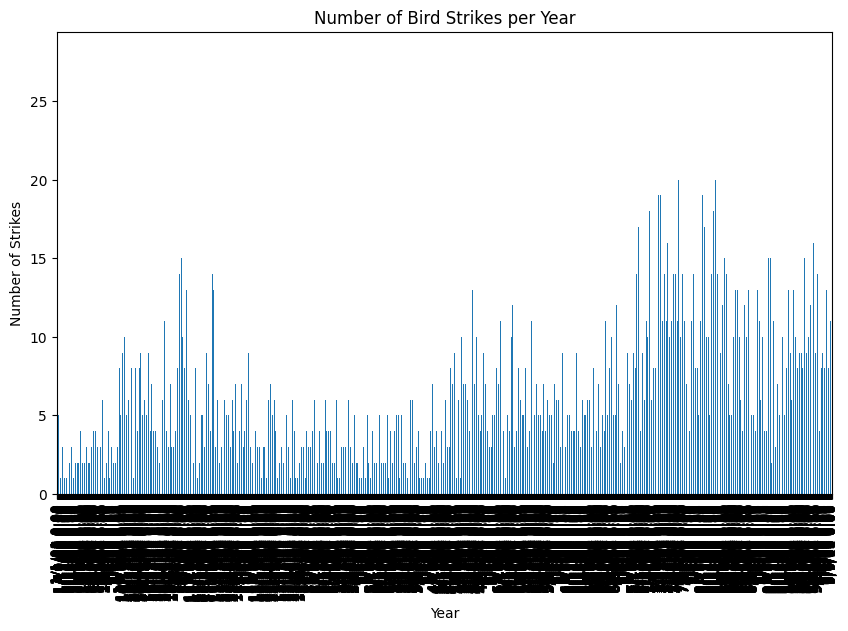

In [11]:
# 1. Number of Bird Strikes
plt.figure(figsize=(10, 6))
df['FlightDate'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Bird Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()


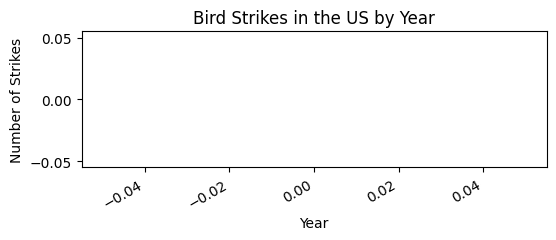

In [9]:
# 2. Yearly Analysis & Bird Strikes in the US
us_strikes = df[df['Origin State'] == 'US']
plt.figure(figsize=(6,2))
us_strikes['FlightDate'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Bird Strikes in the US by Year')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()

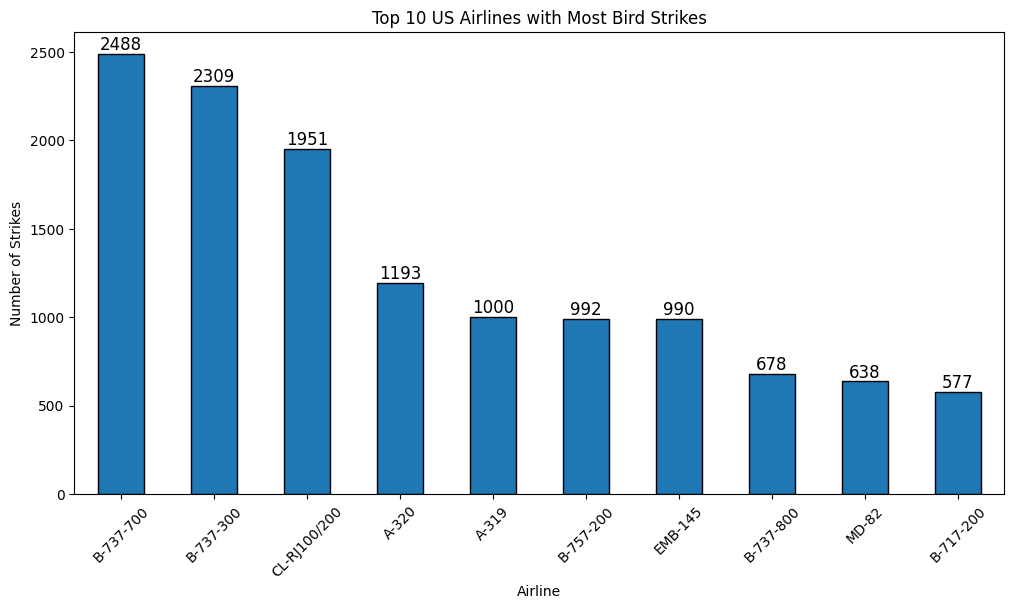

In [12]:
#●	Top 10 US Airlines in terms of having encountered bird strikes
plt.figure(figsize=(12, 6))
bars = df['Aircraft: Make/Model'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)

# Add numbers to the bar plot
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(str(int(height)), 
                 (bar.get_x() + bar.get_width()/2, height), 
                 ha='center', va='bottom', 
                 fontsize=12)

plt.show()


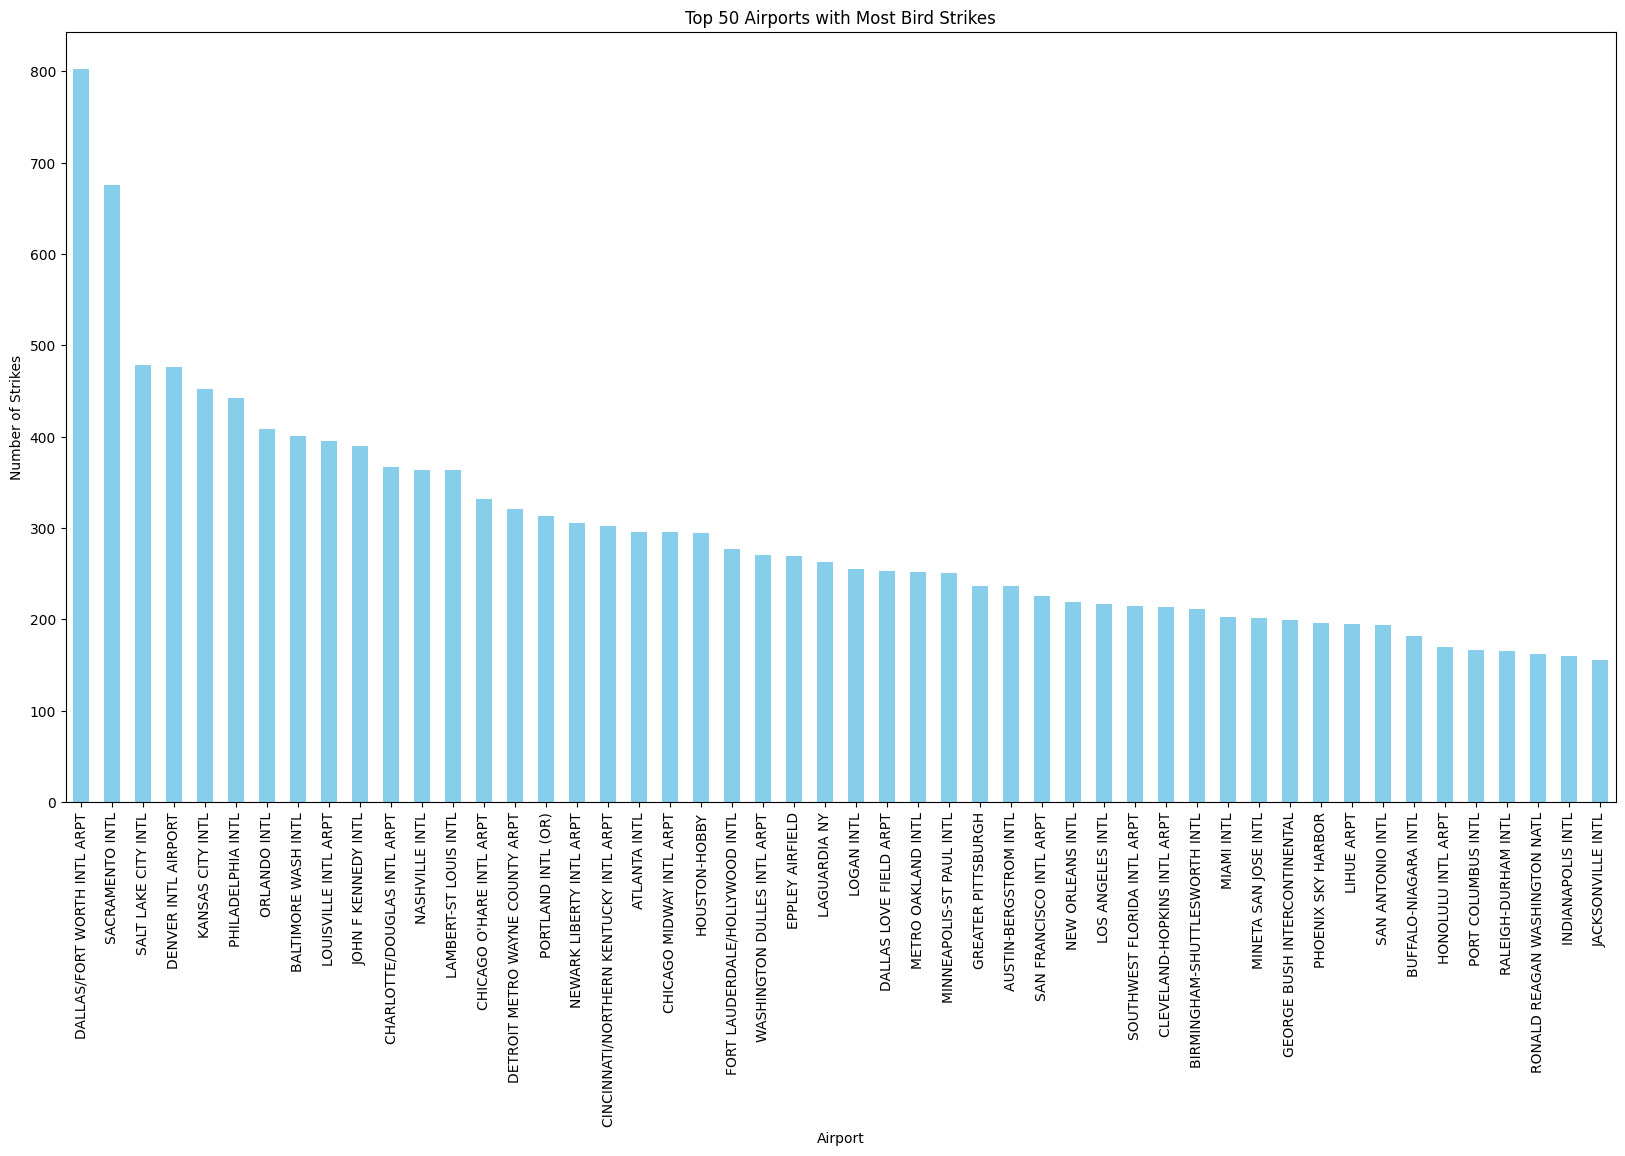

In [18]:
# 4. Airports with most incidents of bird strikes – Top 50
plt.figure(figsize=(20,10))
df['Airport: Name'].value_counts().head(50).plot(kind='bar',color='skyblue')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=90)
plt.show()

In [12]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])


In [13]:
df['Year'] = df['FlightDate'].dt.year

In [14]:
#df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')

In [15]:
yearly_cost = df.groupby(df['FlightDate'].dt.year)['Cost: Total $'].sum()


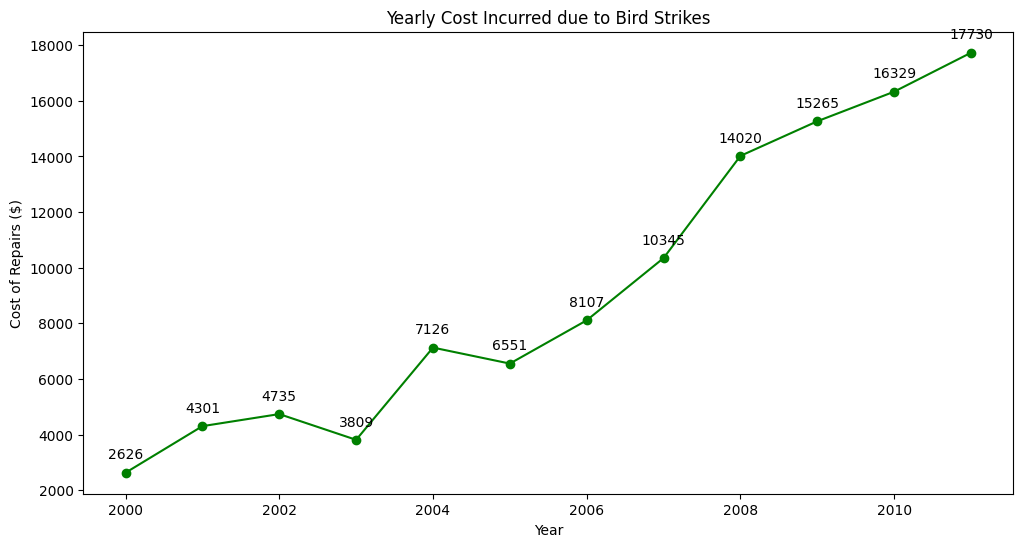

In [61]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')
yearly_cost = df.groupby(df['FlightDate'].dt.year)['Cost: Total $'].sum()

plt.figure(figsize=(12, 6))
yearly_cost.plot(kind='line', marker='o', color='green')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Cost of Repairs ($)')

# Add numbers to the line plot
for x, y in zip(yearly_cost.index, yearly_cost.values):
    plt.annotate(str(int(y)), # text to display
                 (x, y), # point to annotate
                 textcoords="offset points", # how to position the text
                 xytext=(0, 10), # distance from the point to the text
                 ha='center') # horizontal alignment

plt.show()


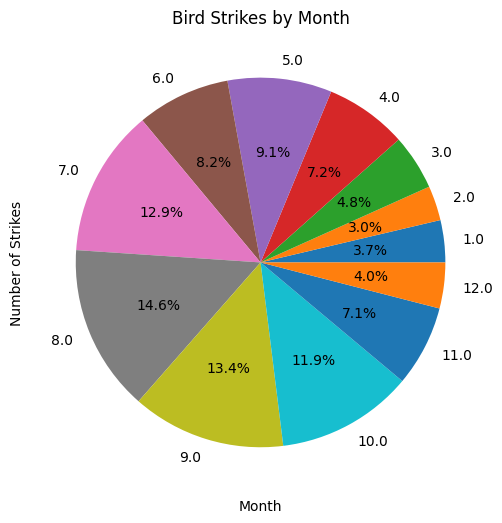

In [17]:
## 6. When do most bird strikes occur?
df['When: Month'] = pd.to_datetime(df['FlightDate']).dt.month
plt.figure(figsize=(12, 6))
df['When: Month'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title('Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Strikes')
plt.show()



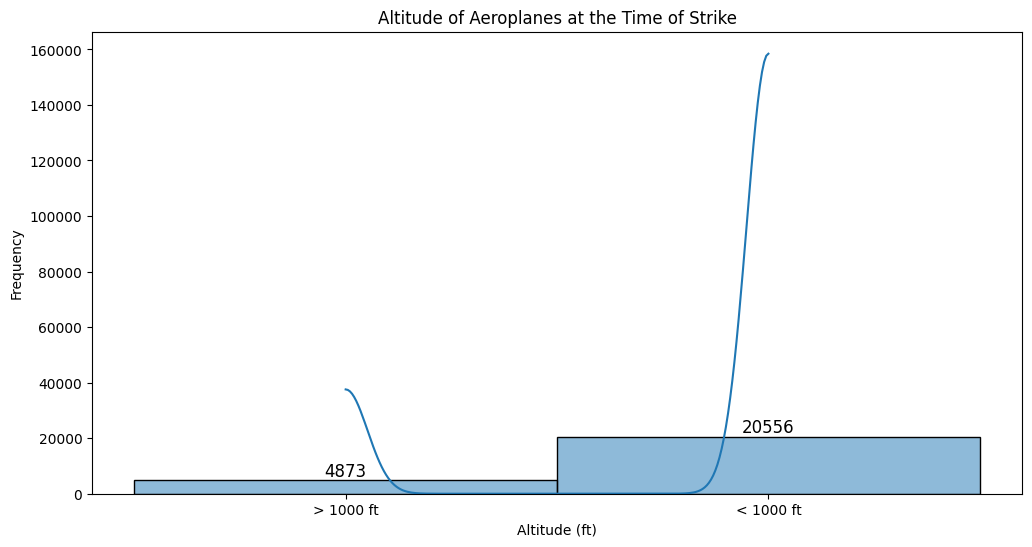

In [60]:
## 7. Altitude of aeroplanes at the time of strike
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['Altitude bin'], bins=50, kde=True)
plt.title('Altitude of Aeroplanes at the Time of Strike')
plt.xlabel('Altitude (ft)')
plt.ylabel('Frequency')

# Add numbers to the histplot
for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(int(patch.get_height())), 
            fontsize=12, ha='center', va='bottom')

plt.show()



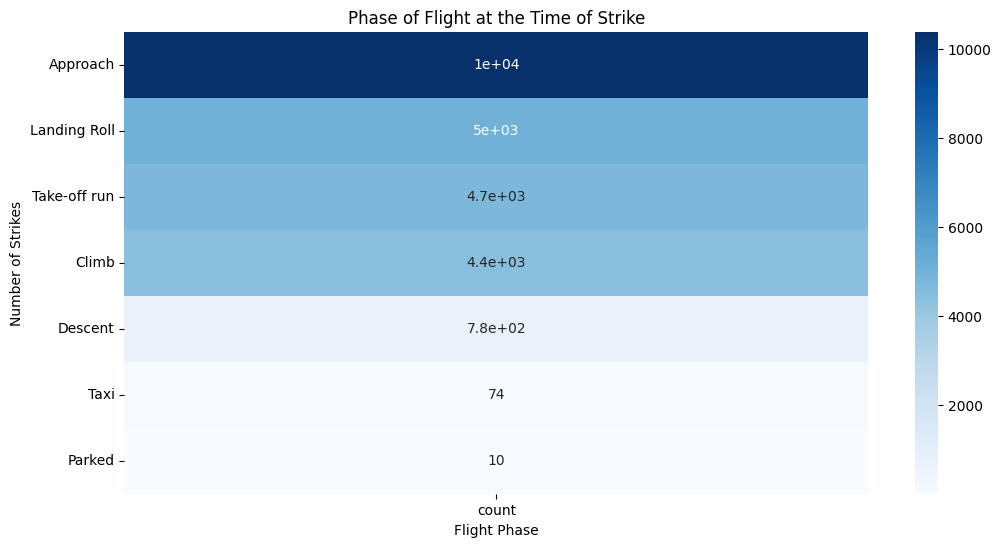

In [19]:
# 8. Phase of flight at the time of the strike
plt.figure(figsize=(12, 6))
sns.heatmap(df['When: Phase of flight'].value_counts().to_frame(), annot=True, cmap="Blues")
plt.title('Phase of Flight at the Time of Strike')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Strikes')
plt.show()


In [20]:
#avg_altitude = df.groupby('When: Phase of flight')['Altitude bin'].mean().sort_values(ascending=False)
#avg_altitude = df.groupby('When: Phase of flight')['Altitude bin'].apply(pd.to_numeric, errors='coerce').mean().sort_values(ascending=False)
#avg_altitude = df.groupby('When: Phase of flight')['Altitude bin'].apply(pd.to_numeric, errors='coerce').sort_values(ascending=False)

# Group by flight phase and calculate average altitude
avg_altitude = df.groupby('When: Phase of flight')['Feet above ground'].apply(pd.to_numeric, errors='coerce').sort_values(ascending=False)



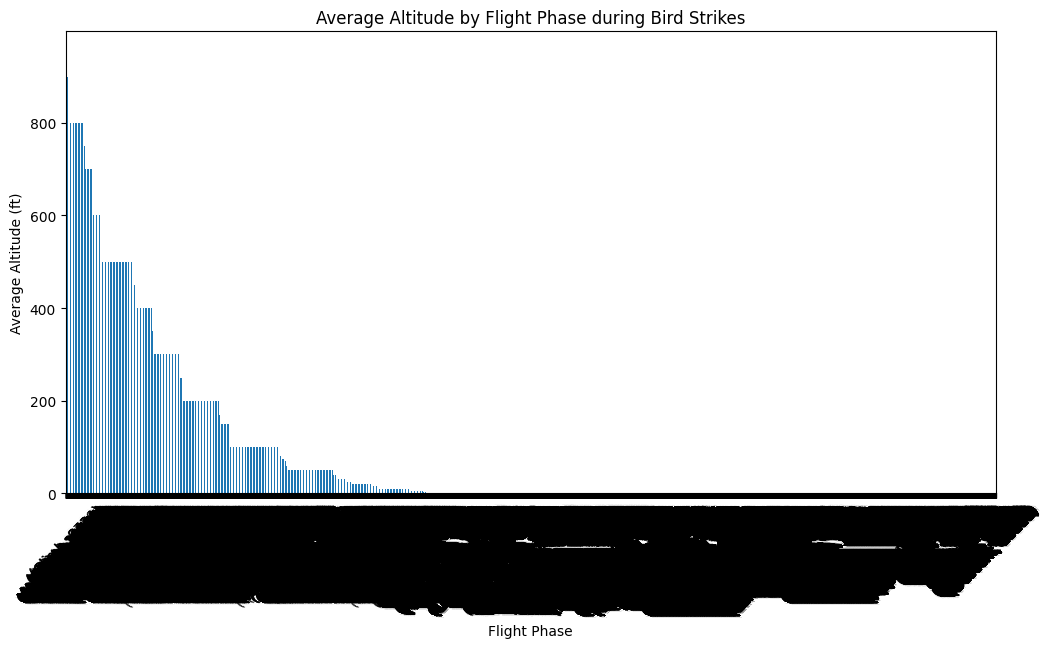

In [21]:
# 9. Average Altitude of the aeroplanes in different phases at the time of strike
plt.figure(figsize=(12, 6))
avg_altitude.plot(kind='bar')
plt.title('Average Altitude by Flight Phase during Bird Strikes')
plt.xlabel('Flight Phase')
plt.ylabel('Average Altitude (ft)')
plt.xticks(rotation=45)
plt.show()

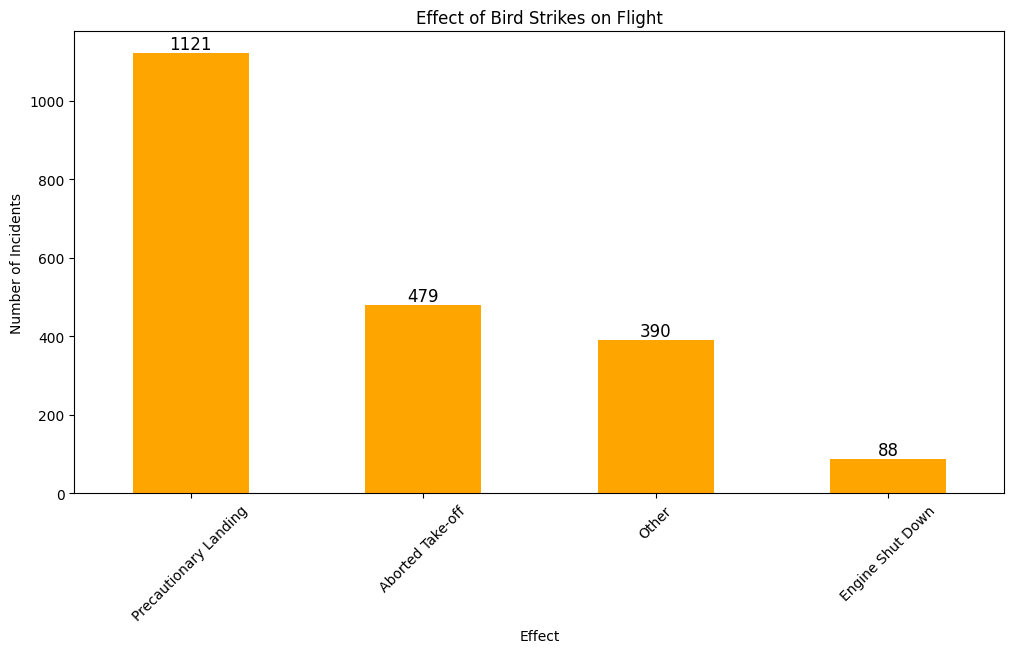

In [58]:
plt.figure(figsize=(12, 6))
df['Effect: Impact to flight'].value_counts().plot(kind='bar', color='orange')
plt.title('Effect of Bird Strikes on Flight')
plt.xlabel('Effect')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Add numbers to the bar chart
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()), 
             fontsize=12, ha='center', va='bottom')

plt.show()


In [53]:
print(df['Feet above ground'].value_counts().head(10))
print(df['Feet above ground'].dtype)

Feet above ground
0        9843
100      1357
50       1259
200      1001
10        893
500       890
1,000     826
300       683
3,000     603
2,000     578
Name: count, dtype: int64
object


In [54]:
def clean_altitude(value):
    if isinstance(value, (int, float)):
        return value
    try:
        # Remove commas and convert to float
        return float(str(value).replace(',', ''))
    except ValueError:
        # If conversion fails, return NaN
        return np.nan

# Apply the cleaning function
df['Feet above ground'] = df['Feet above ground'].apply(clean_altitude)

posx and posy should be finite values
posx and posy should be finite values


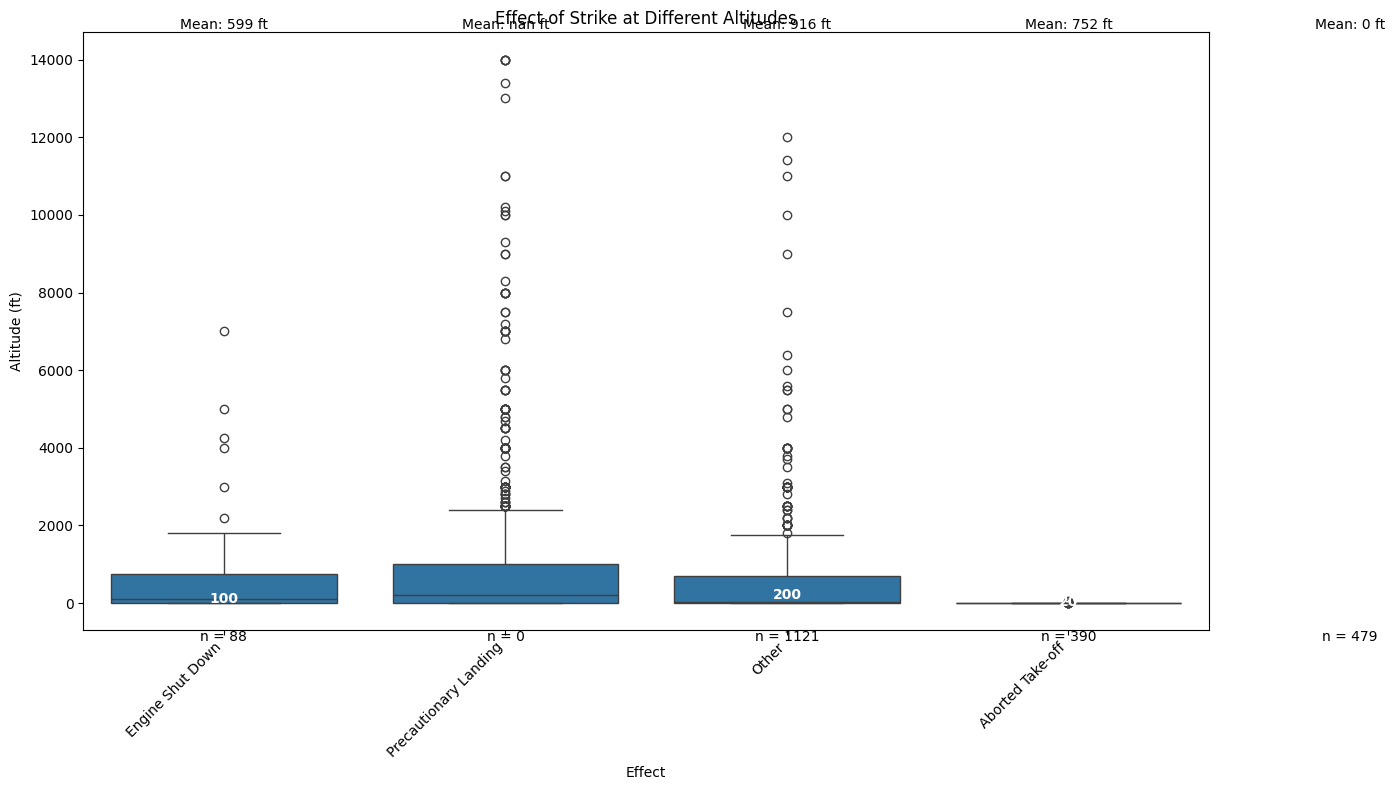

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 8))

# Create the box plot
ax = sns.boxplot(x='Effect: Impact to flight', y='Feet above ground', data=df)

# Calculate mean values and sample sizes
effects = df['Effect: Impact to flight'].unique()
for i, effect in enumerate(effects):
    subset = df[df['Effect: Impact to flight'] == effect]['Feet above ground']
    mean_alt = subset.mean()
    median_alt = subset.median()
    sample_size = subset.count()
    
    # Add mean value text
    plt.text(i, plt.ylim()[1], f'Mean: {mean_alt:.0f} ft', 
             horizontalalignment='center', verticalalignment='bottom')
    
    # Add sample size text
    plt.text(i, plt.ylim()[0], f'n = {sample_size}', 
             horizontalalignment='center', verticalalignment='top')
    
    # Add median value to the box
    plt.text(i, median_alt, f'{median_alt:.0f}', 
             horizontalalignment='center', verticalalignment='center',
             fontweight='bold', color='white')

plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Effect')
plt.ylabel('Altitude (ft)')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


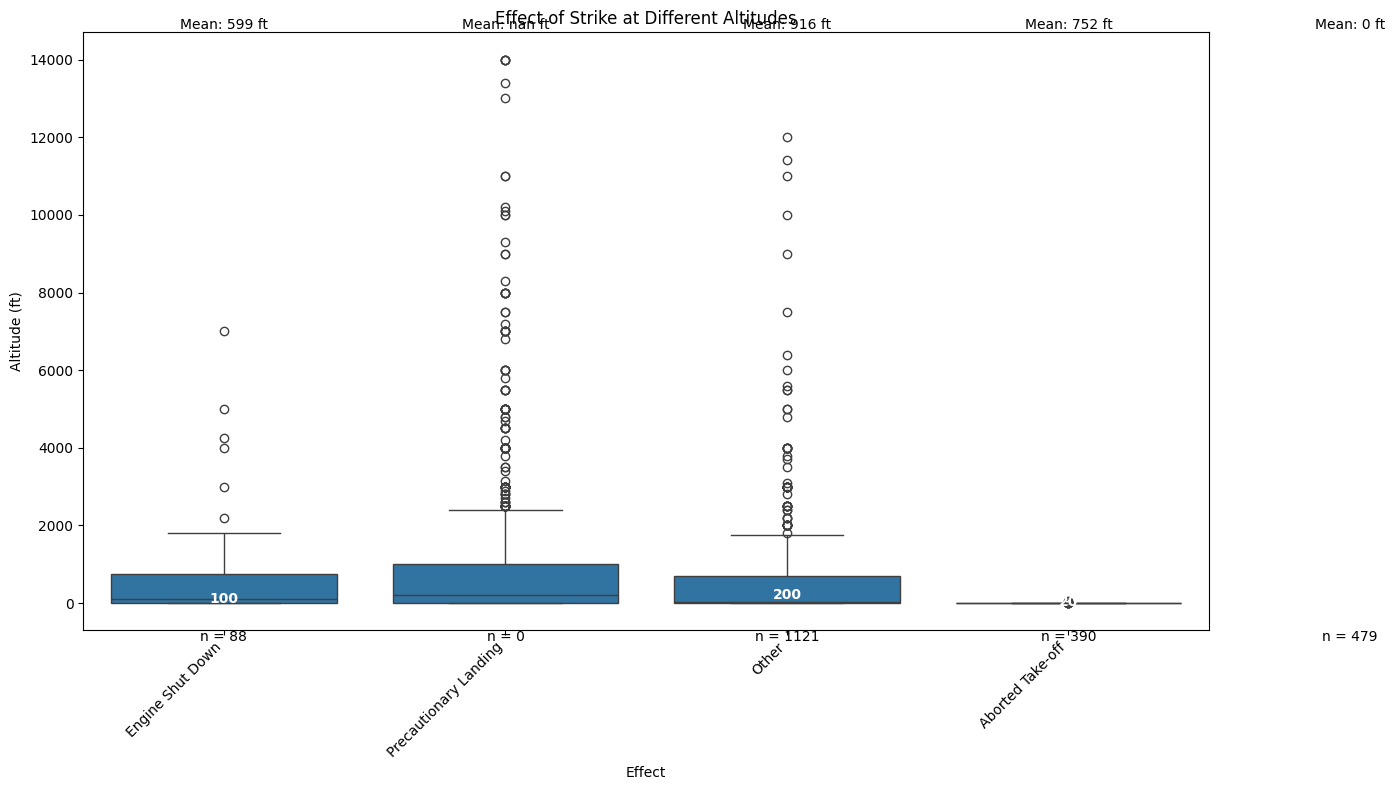

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 8))

# Create the box plot
ax = sns.boxplot(x='Effect: Impact to flight', y='Feet above ground', data=df)

# Calculate mean values and sample sizes
effects = df['Effect: Impact to flight'].unique()
for i, effect in enumerate(effects):
    subset = df[df['Effect: Impact to flight'] == effect]['Feet above ground']
    mean_alt = subset.mean()
    median_alt = subset.median()
    sample_size = subset.count()
    
    # Add mean value text
    plt.text(i, plt.ylim()[1], f'Mean: {mean_alt:.0f} ft', 
             horizontalalignment='center', verticalalignment='bottom')
    
    # Add sample size text
    plt.text(i, plt.ylim()[0], f'n = {sample_size}', 
             horizontalalignment='center', verticalalignment='top')
    
    # Add median value to the box
    plt.text(i, median_alt, f'{median_alt:.0f}', 
             horizontalalignment='center', verticalalignment='center',
             fontweight='bold', color='white')

plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Effect')
plt.ylabel('Altitude (ft)')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


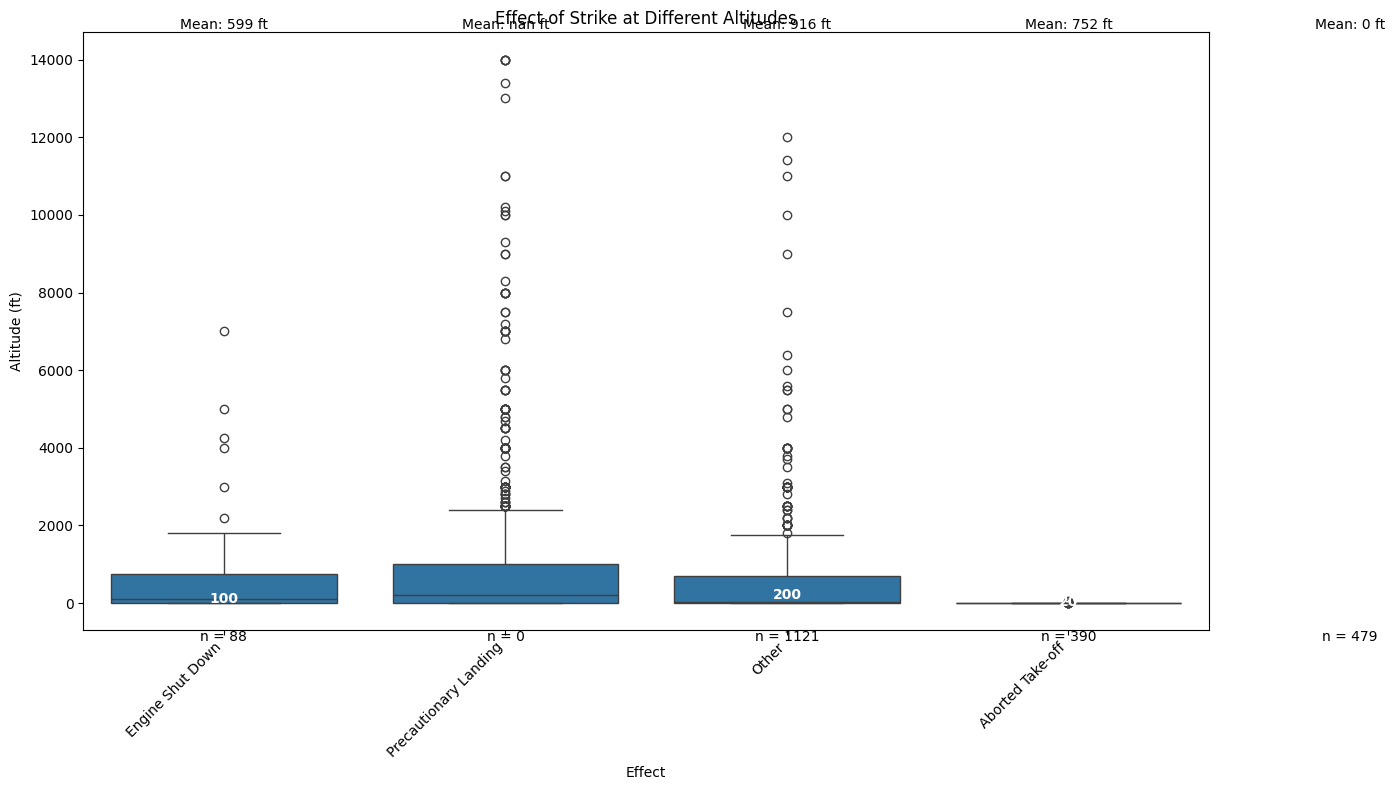

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 8))

# Create the box plot
ax = sns.boxplot(x='Effect: Impact to flight', y='Feet above ground', data=df)

# Calculate mean values and sample sizes
effects = df['Effect: Impact to flight'].unique()
for i, effect in enumerate(effects):
    subset = df[df['Effect: Impact to flight'] == effect]['Feet above ground']
    mean_alt = subset.mean()
    median_alt = subset.median()
    sample_size = subset.count()
    
    # Add mean value text
    plt.text(i, plt.ylim()[1], f'Mean: {mean_alt:.0f} ft', 
             horizontalalignment='center', verticalalignment='bottom')
    
    # Add sample size text
    plt.text(i, plt.ylim()[0], f'n = {sample_size}', 
             horizontalalignment='center', verticalalignment='top')
    
    # Add median value to the box
    plt.text(i, median_alt, f'{median_alt:.0f}', 
             horizontalalignment='center', verticalalignment='center',
             fontweight='bold', color='white')

plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Effect')
plt.ylabel('Altitude (ft)')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

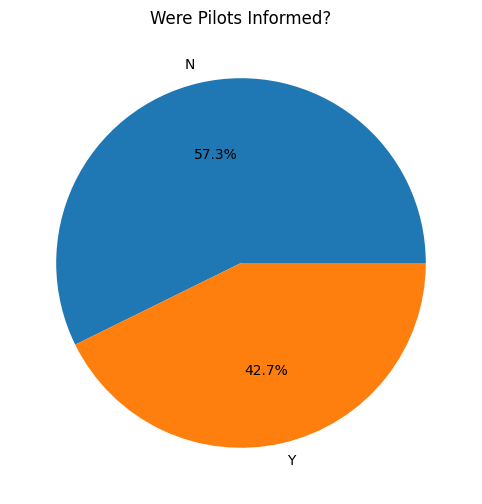

In [24]:
# 12. Were Pilots Informed? & Prior Warning and Effect of Strike Relation

plt.figure(figsize=(12, 6))
df['Pilot warned of birds or wildlife?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Were Pilots Informed?')
plt.ylabel('')
plt.show()


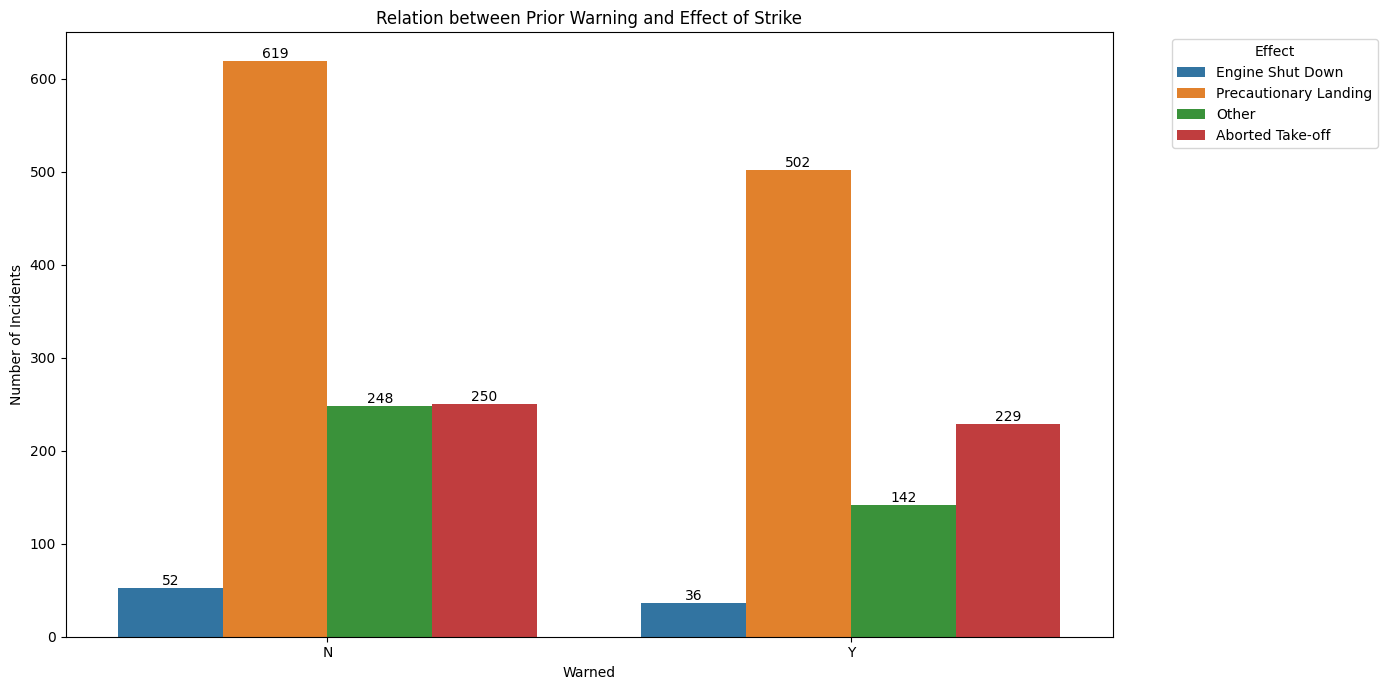

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))  # Increased figure size to accommodate labels

# Create the countplot
ax = sns.countplot(x='Pilot warned of birds or wildlife?', hue='Effect: Impact to flight', data=df)

plt.title('Relation between Prior Warning and Effect of Strike')
plt.xlabel('Warned')
plt.ylabel('Number of Incidents')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Adjust legend position and layout
plt.legend(title='Effect', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
print(X_train.dtypes)
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Record ID                                     int64
Aircraft: Type                               object
Altitude bin                                 object
Wildlife: Number struck                      object
Aircraft: Make/Model_A-10A                     bool
                                              ...  
Airport: Name_YELLOWSTONE REGIONAL             bool
Airport: Name_YOUNGSTOWN-WARREN RGNL ARPT      bool
Airport: Name_ZAMPERINI FIELD ARPT             bool
Airport: Name_ZELIENOPLE MUNICIPAL             bool
Airport: Name_ZURICH                           bool
Length: 1464, dtype: object
Record ID                                     0
Aircraft: Type                               99
Altitude bin                                 99
Wildlife: Number struck                      99
Aircraft: Make/Model_A-10A                    0
                                             ..
Airport: Name_YELLOWSTONE REGIONAL            0
Airport: Name_YOUNGSTOWN-WARREN RGNL ARPT     0
Airport: Name_ZA

In [36]:
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
X_train[numeric_columns] = X_train[numeric_columns].fillna(X_train[numeric_columns].mean())


In [37]:
# Handle missing values for non-numeric columns
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns
X_train[categorical_columns] = X_train[categorical_columns].fillna(X_train[categorical_columns].mode().iloc[0])


In [38]:
# Handle missing values in y_train
y_train = y_train.fillna(y_train.mode().iloc[0])


In [39]:
# Convert categorical variables to numeric
le = LabelEncoder()
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col].astype(str))

In [40]:
# Convert y_train to numeric if it's not already
y_train = le.fit_transform(y_train.astype(str))

In [41]:
# Now try fitting the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

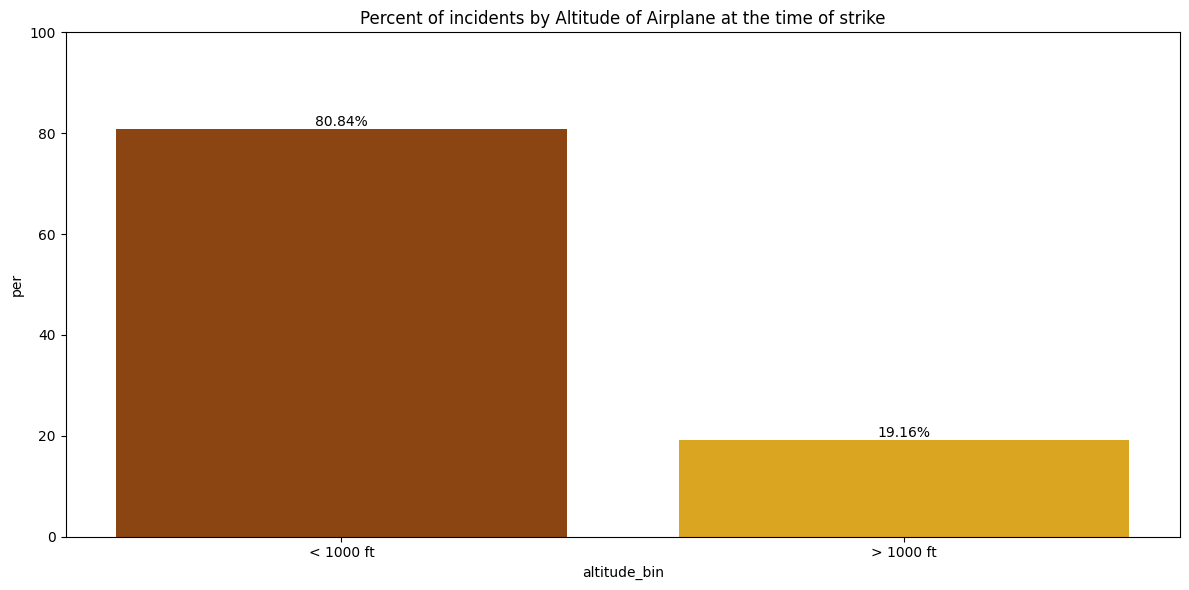

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data in a dictionary or two lists
altitudes = ['< 1000 ft', '> 1000 ft']
percentages = [80.84, 19.16]

plt.figure(figsize=(12, 6))
bars = plt.bar(altitudes, percentages, color=['#8B4513', '#DAA520'])

plt.title('Percent of incidents by Altitude of Airplane at the time of strike')
plt.xlabel('altitude_bin')
plt.ylabel('per')
plt.ylim(0, 100)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

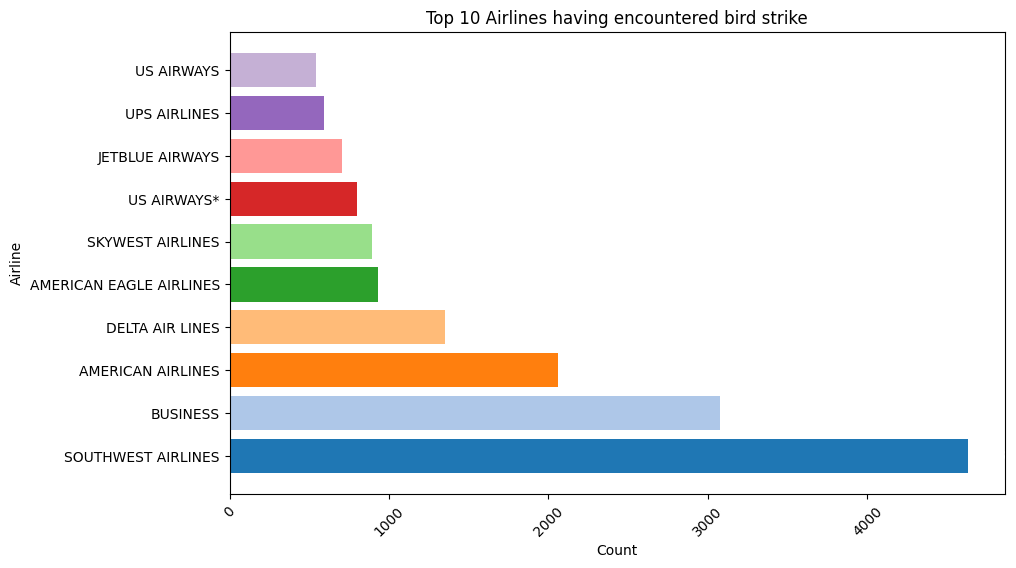

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each airline and sort in descending order
airline_counts = df['Aircraft: Airline/Operator'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(airline_counts.index, airline_counts.values, color=plt.cm.tab20(range(10)))
plt.xlabel('Count')
plt.ylabel('Airline')
plt.title('Top 10 Airlines having encountered bird strike')
plt.xticks(rotation=45)

# Add text labels to the bars
for i, (airline, count) in enumerate(airline_counts.items()):
    plt.text(count, i, str(count), ha='left', va='center', color='white', fontweight='bold')

plt.show()


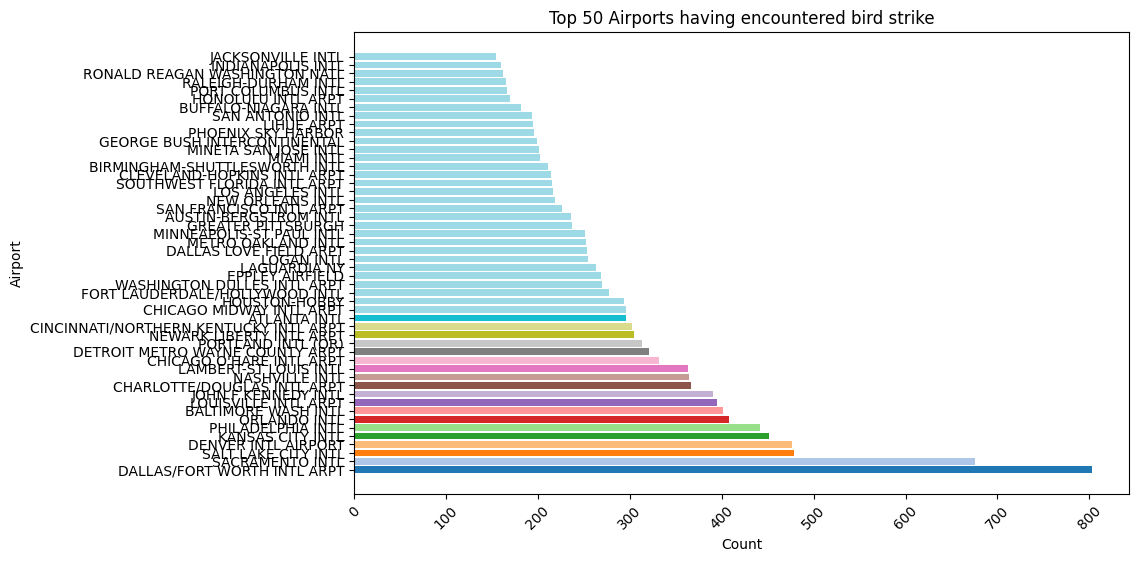

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each airport and sort in descending order
airport_counts = df['Airport: Name'].value_counts().head(50)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(airport_counts.index, airport_counts.values, color=plt.cm.tab20(range(50)))
plt.xlabel('Count')
plt.ylabel('Airport')
plt.title('Top 50 Airports having encountered bird strike')
plt.xticks(rotation=45)

# Add text labels to the bars
for i, (airport, count) in enumerate(airport_counts.items()):
    plt.text(count, i, str(count), ha='left', va='center', color='white', fontweight='bold')

plt.show()


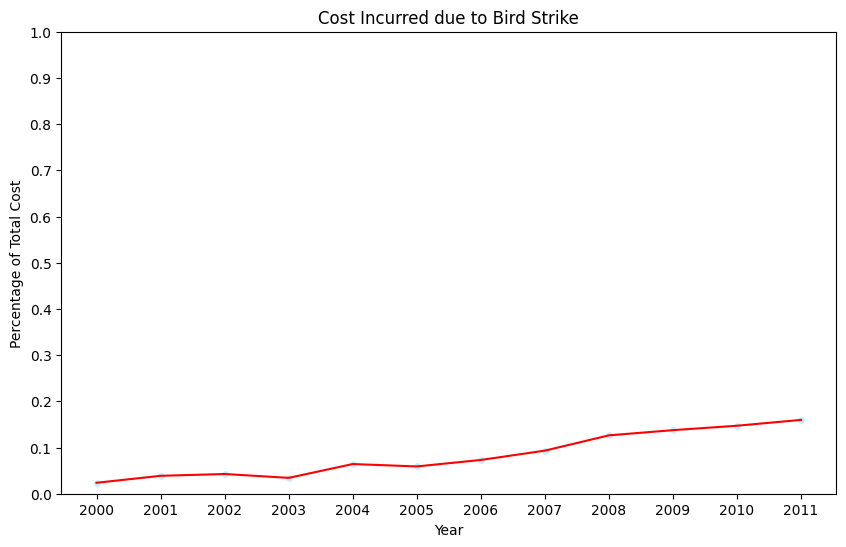

In [70]:
#Yearly cost incured due to bird strike
import matplotlib.pyplot as plt
import pandas as pd

# Extract year from FlightDate
df['Year'] = pd.DatetimeIndex(df['FlightDate']).year

# Group by year and calculate total cost
cost_by_year = df.groupby('Year')['Cost: Total $'].sum().reset_index()

# Calculate percentage of total cost
cost_by_year['per'] = cost_by_year['Cost: Total $'] / cost_by_year['Cost: Total $'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(cost_by_year['Year'], cost_by_year['per'], color='red')
plt.scatter(cost_by_year['Year'], cost_by_year['per'], s=15, color='#BFEFFF')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Cost')
plt.title('Cost Incurred due to Bird Strike')
plt.xticks(range(2000, 2012))
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()
